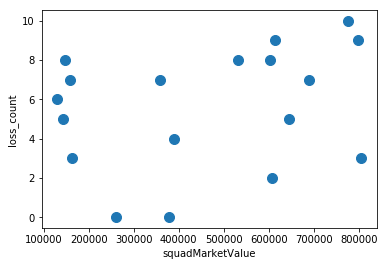

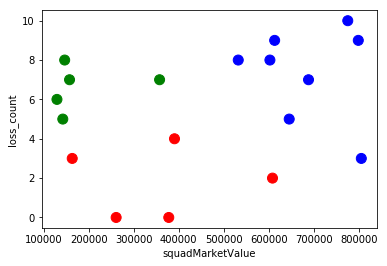

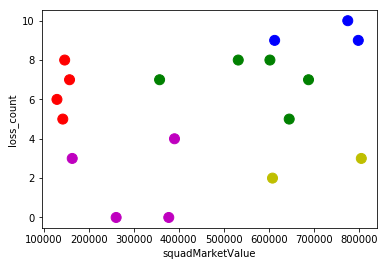

In [9]:
import requests
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.vq import whiten, kmeans2

%matplotlib inline


def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers={'X-Auth-Token': '5ca566ff28714fc38fbfb3b7e7c3ec0a'}).json()
        return json[result_key]
    except:
        print(json)
        return None


def main():
    teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')

    team_for_pd = []
    for team in teams:
        fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
        loss_count = 0
        for f in fixtures:
            if f['result']['goalsHomeTeam'] is not None and f['result']['goalsAwayTeam'] is not None:
                if team['name'] == f['homeTeamName']:
                    if f['result']['goalsHomeTeam'] < f['result']['goalsAwayTeam']:
                        loss_count += 1
                else:
                    if f['result']['goalsHomeTeam'] > f['result']['goalsAwayTeam']:
                        loss_count += 1
        team_for_pd.append({
            'name': team['name'],
            'squadMarketValue': random.randint(100000, 1000000),
            'loss_count': loss_count
        })

    teams_pd = pd.DataFrame(team_for_pd)
    teams_pd.plot.scatter(x='squadMarketValue', y='loss_count', s=100)

    del teams_pd['name']
    whitened = whiten(teams_pd.as_matrix())

    centroids, cluster_map = kmeans2(whitened, 3)
    colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
    colors = [colors_map[c] for c in cluster_map]
    teams_pd.plot.scatter(x='squadMarketValue', y='loss_count', c=colors, s=100)

    centroids, cluster_map = kmeans2(whitened, 5)
    colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
    colors = [colors_map[c] for c in cluster_map]
    teams_pd.plot.scatter(x='squadMarketValue', y='loss_count', c=colors, s=100)

if __name__ == '__main__':
    main()